## Loading Datasets

## Data Understanding for train dataset

## Data Preparation for baseline model(s)

## Building baseline models

## Implementing Decision tree as a baseline model

## Implementing Random Forest as a baseline model

## Implementing Random Forest as a baseline model

## Data Preparation - Feature engineering (Part 1)
0. Do sampling data
1. Inspect the distributions
2. Do scaling and store it into pickle



## Working with pre-proccessed data

## Neural nets model

## Random Forest model

Model report

## XGBOOST Model for imbalance dataset

## XGBOOST CONFUSION MATRIX

## Modeling part 3 using balanced dataset

## Done with pre-processing data for modeling part 3

## Neural Nets model

In [ ]:
# import packages
import pandas as pd # Importing libraries for data manipulation
import numpy as np # Importing libraries for data manipulation
import os # Importing os library for operating system dependent functionality
import matplotlib.pyplot as plt # Importing libraries for data visualization
import seaborn as sns # Importing libraries for data visualization

In [ ]:
from google.colab import drive # Importing Google Colab module for using Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Varibales holding path to my datasets both train and test

file_path_Train = '/content/drive/MyDrive/AI & ML/Final Project /ProjectTrainingData.csv'
file_path_Test = '/content/drive/MyDrive/AI & ML/Final Project /ProjectTestData.csv'

In [ ]:
# Loading datasets
data_train = pd.read_csv(file_path_Train)
data_test = pd.read_csv(file_path_Test)

In [ ]:
# label encoding our datasets


def label_encoding_on_train_test(train_df, test_df):
    #train_df = train_df.drop('click', axis=1)
    cat_cols = train_df.select_dtypes(include='object').columns

    train_label_encoded = train_df.copy()
    test_label_encoded = test_df.copy()

    for col in cat_cols:
        le = LabelEncoder()

        # Corrected concatenation for fitting the encoder
        # It concatenates the values of the column from both dataframes
        le.fit(pd.concat([train_df[col], test_df[col]], ignore_index=True))

        # Transform the training and test data with the fitted encoder
        train_label_encoded[col] = le.transform(train_df[col])
        test_label_encoded[col] = le.transform(test_df[col])

    return train_label_encoded, test_label_encoded

In [ ]:
# Reuse the function to perform encoding
from sklearn.preprocessing import LabelEncoder # Importing Scikit-learn modules for machine learning tasks
train_label_encoded, test_label_encoded = label_encoding_on_train_test(data_train, data_test)

In [ ]:
# Transforming hour column in the test dataset before exporting it

# Transforming hour variable
# Convert 'hour' to datetime
test_label_encoded['hour'] = pd.to_datetime(test_label_encoded['hour'], format='%y%m%d%H')

# Create 'day_of_week' column
test_label_encoded['day_of_week'] = test_label_encoded['hour'].dt.day_name()


In [ ]:
# Function to categorize part of the day with numerical values
def get_part_of_day(hour):
    if 5 <= hour < 11:
        return 1  # morning
    elif 11 <= hour < 17:
        return 2  # noon
    elif 17 <= hour < 20:
        return 3  # evening
    else:
        return 4  # night


# Create 'part_of_day' column
test_label_encoded['part_of_day'] = test_label_encoded['hour'].dt.hour.apply(get_part_of_day)

In [ ]:
# Label encoding day of the week column into numerical values

# Sample data
days = {'day_of_week': ['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday']}
# Custom mapping for days of the week
day_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

# Apply the mapping to the 'day_of_week' column
test_label_encoded['day_of_week'] = test_label_encoded['day_of_week'].map(day_mapping)

In [ ]:
# Saving encoded test dataset on my drive

from google.colab import drive # Importing Google Colab module for using Google Drive
import os # Importing os library for operating system dependent functionality

# Mount your Google Drive
drive.mount('/content/drive')-

drive_path = '/content/drive/MyDrive/AI & ML/Final Project /'  # You can change this to a specific folder in your Drive
file_name = 'test_label_encoded.csv'
full_path = os.path.join(drive_path, file_name)

# Convert DataFrame to a CSV file and save it in the specified path
test_label_encoded.to_csv(full_path, index=False)

print(f"File saved to: {full_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File saved to: /content/drive/MyDrive/AI & ML/Final Project /test_label_encoded.csv


In [ ]:
# To free up RAM by deleting

import gc # Importing garbage collection module
# Delete the variable
del test_label_encoded
# Run the garbage collector
gc.collect()


0

In [ ]:
# dropoing id from the train dataset
data = train_label_encoded.drop('id', axis=1)


In [ ]:
# Summary statistics for numerical features
print(data.describe())

                 id         click          hour            C1    banner_pos  \
count  3.199109e+07  3.199109e+07  3.199109e+07  3.199109e+07  3.199109e+07   
mean   9.222850e+18  1.698903e-01  1.410251e+07  1.004971e+03  2.939784e-01   
std    5.325227e+18  3.755364e-01  2.675669e+02  1.115785e+00  5.104750e-01   
min    5.211594e+11  0.000000e+00  1.410210e+07  1.001000e+03  0.000000e+00   
25%    4.611571e+18  0.000000e+00  1.410222e+07  1.005000e+03  0.000000e+00   
50%    9.223074e+18  0.000000e+00  1.410251e+07  1.005000e+03  0.000000e+00   
75%    1.383506e+19  0.000000e+00  1.410280e+07  1.005000e+03  1.000000e+00   
max    1.844674e+19  1.000000e+00  1.410292e+07  1.012000e+03  7.000000e+00   

            site_id   site_domain  site_category        app_id    app_domain  \
count  3.199109e+07  3.199109e+07   3.199109e+07  3.199109e+07  3.199109e+07   
mean   2.322867e+03  5.277458e+03   1.103589e+01  7.352972e+03  2.568173e+02   
std    1.199122e+03  1.866177e+03   9.188907e+00

In [ ]:
# check missing values
data.isna().sum()

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

In [ ]:
# Check the number of rows and columns
data.shape

(31991090, 24)

In [ ]:
#Inspecting distribution for each class
data['click'].value_counts()

0    26556113
1     5434977
Name: click, dtype: int64

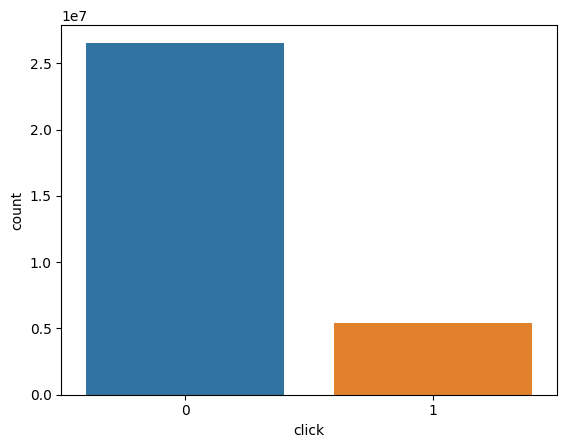

In [ ]:
# Visualize distribution for each class
sns.countplot(x='click', data=data)
plt.show()

In [ ]:
# Inspecting features data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31991090 entries, 0 to 31991089
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                float64
 1   click             int64  
 2   hour              int64  
 3   C1                int64  
 4   banner_pos        int64  
 5   site_id           object 
 6   site_domain       object 
 7   site_category     object 
 8   app_id            object 
 9   app_domain        object 
 10  app_category      object 
 11  device_id         object 
 12  device_ip         object 
 13  device_model      object 
 14  device_type       int64  
 15  device_conn_type  int64  
 16  C14               int64  
 17  C15               int64  
 18  C16               int64  
 19  C17               int64  
 20  C18               int64  
 21  C19               int64  
 22  C20               int64  
 23  C21               int64  
dtypes: float64(1), int64(14), object(9)
memory usage: 5.7+ GB


In [ ]:
# inspecting the distribution for id  feature
data['id'].value_counts()

1.000009e+18    1
1.719804e+19    1
1.719762e+19    1
1.719757e+19    1
1.719721e+19    1
               ..
1.399590e+19    1
1.399589e+19    1
1.399579e+19    1
1.399562e+19    1
9.999868e+18    1
Name: id, Length: 31991090, dtype: int64

In [ ]:
# inspecting the distribution for hour  feature
data['hour'].value_counts()

14102209    395537
14102210    387116
14102813    381861
14102212    361069
14102814    342052
             ...  
14102419     30138
14102423     22644
14102420     20435
14102421     18012
14102422     13134
Name: hour, Length: 216, dtype: int64

In [ ]:
# inspecting the distribution for C1  feature
data['C1'].value_counts()

1005    29303261
1002     1797703
1010      756708
1012       91153
1007       29113
1001        8121
1008        5031
Name: C1, dtype: int64

In [ ]:
# inspecting the distribution for banner_pos  feature
data['banner_pos'].value_counts()

0    22851592
1     9080926
7       35522
2       10220
4        6130
5        5025
3        1675
Name: banner_pos, dtype: int64

In [ ]:
# inspecting the distribution for site_id  feature
data['site_id'].value_counts()

85f751fd    11170690
1fbe01fe     5216249
e151e245     2095395
d9750ee7      786829
5b08c53b      719069
              ...   
5ca99928           1
b41122f3           1
c917e7c4           1
8ddca941           1
2b5a3840           1
Name: site_id, Length: 4581, dtype: int64

In [ ]:
# inspecting the distribution for site_domain  feature
data['site_domain'].value_counts()

c4e18dd6    11598113
f3845767     5216249
7e091613     2689322
7687a86e     1018563
98572c79      815762
              ...   
2552abbe           1
a4484b8f           1
a5cfe271           1
b5bb779b           1
f5646435           1
Name: site_domain, Length: 7341, dtype: int64

In [ ]:
# inspecting the distribution for site_category  feature
data['site_category'].value_counts()

50e219e0    12731910
f028772b    10210332
28905ebd     5952006
3e814130     2442362
f66779e6      212135
75fa27f6      135240
335d28a8      107151
76b2941d       89924
c0dd3be3       33689
72722551       21084
dedf689d       19331
0569f928       14137
70fb0e29       12309
a818d37a        2674
8fd0aea4        2082
42a36e14        2039
e787de0e        1080
bcf865d9         909
5378d028         372
9ccfa2ea         279
da34532e          21
74073276          11
110ab22d           5
c706e647           4
6432c423           2
a72a0145           2
Name: site_category, dtype: int64

In [ ]:
# inspecting the distribution for app_id  feature
data['app_id'].value_counts()

ecad2386    20820400
92f5800b     1370822
e2fcccd2      885029
febd1138      597426
7358e05e      511789
              ...   
ced21223           1
50d939e1           1
85e225ac           1
e9238543           1
c167b367           1
Name: app_id, Length: 8088, dtype: int64

In [ ]:
# inspecting the distribution for app_domain  feature
data['app_domain'].value_counts()

7801e8d9    21989338
2347f47a     3715051
ae637522     1637618
5c5a694b      885193
82e27996      597451
              ...   
65a98a05           1
6dc31ecb           1
1dc4224a           1
2c94e6e5           1
4f983e50           1
Name: app_domain, Length: 526, dtype: int64

In [ ]:
# inspecting the distribution for app_category  feature
data['app_category'].value_counts()

07d7df22    21101482
0f2161f8     7487678
cef3e649     1414688
8ded1f7a     1020683
f95efa07      668647
d1327cf5      101717
09481d60       47889
dc97ec06       44034
75d80bbe       32699
fc6fa53d       19224
4ce2e9fc       16178
879c24eb       10319
a3c42688        8897
4681bb9d        5266
0f9a328c        4702
2281a340        1890
a86a3e89        1824
8df2e842        1308
79f0b860         529
0bfbc358         374
a7fd01ec         302
7113d72a         246
18b1e0be         180
2fc4f2aa         163
5326cf99         112
0d82db25          21
4b7ade46          12
bf8ac856           8
71af18ce           5
bd41f328           4
86c1a5a3           3
ef03ae90           2
cba0e20d           1
f395a87f           1
52de74cf           1
6fea3693           1
Name: app_category, dtype: int64

In [ ]:
# inspecting the distribution for device_id  feature
data['device_id'].value_counts()

a99f214a    26317545
c357dbff       17428
936e92fb       11075
0f7c61dc       10505
afeffc18        7529
              ...   
6917d905           1
8fd3c372           1
7ab6a414           1
dd2772fa           1
8db7982b           1
Name: device_id, Length: 2296165, dtype: int64

In [ ]:
# inspecting the distribution for device_ip  feature
data['device_ip'].value_counts()

6b9769f2    168598
431b3174    109122
2f323f36     76251
af9205f9     75657
930ec31d     75110
             ...  
f0afcabe         1
5900240c         1
b3c0bb53         1
455761be         1
72797d6c         1
Name: device_ip, Length: 5762925, dtype: int64

In [ ]:
# inspecting the distribution for device_model  feature
data['device_model'].value_counts()

8a4875bd    1956454
1f0bc64f    1104820
d787e91b    1095522
76dc4769     606276
be6db1d7     575432
             ...   
12d72990          1
29ebf6d3          1
7119aecc          1
98689daf          1
cf75288b          1
Name: device_model, Length: 8058, dtype: int64

In [ ]:
# inspecting the distribution for device_type  feature
data['device_type'].value_counts()

1    29436650
0     1797703
4      649162
5      107546
2          29
Name: device_type, dtype: int64

In [ ]:
# inspecting the distribution for device_conn_type  feature
data['device_conn_type'].value_counts()

0    27682244
2     2490117
3     1783125
5       35604
Name: device_conn_type, dtype: int64

In [ ]:
# inspecting the distribution for C14  feature
data['C14'].value_counts()

4687     806285
21611    721379
21191    674706
21189    674684
19771    595087
          ...  
22080         1
23598         1
23573         1
12201         1
23114         1
Name: C14, Length: 2465, dtype: int64

In [ ]:
# inspecting the distribution for C15  feature
data['C15'].value_counts()

320     29830817
300      1836780
216       255596
728        60113
120         2699
1024        2001
480         1775
768         1309
Name: C15, dtype: int64

In [ ]:
# inspecting the distribution for C16  feature
data['C16'].value_counts()

50      30150826
250      1430844
36        255596
480        85927
90         60113
20          2699
768         2001
320         1775
1024        1309
Name: C16, dtype: int64

In [ ]:
# inspecting the distribution for C17  feature
data['C17'].value_counts()

1722    3832113
2424    1349401
2227    1201434
1800    1012963
423      806285
         ...   
2718          7
2575          7
2567          5
1253          2
1516          1
Name: C17, Length: 407, dtype: int64

In [ ]:
# inspecting the distribution for C18  feature
data['C18'].value_counts()

0    13299431
3    10781289
2     5564317
1     2346053
Name: C18, dtype: int64

In [ ]:
# inspecting the distribution for C19  feature
data['C19'].value_counts()

35      9971481
39      7200942
167     2547804
161     1381632
47       886845
         ...   
1447        149
1195        118
545         103
677           7
1959          2
Name: C19, Length: 66, dtype: int64

In [ ]:
# inspecting the distribution for C20  feature
data['C20'].value_counts()

-1         14850201
 100084     1973548
 100111     1424227
 100148     1391345
 100077     1271842
             ...   
 100134           4
 100006           4
 100187           3
 100209           2
 100008           2
Name: C20, Length: 171, dtype: int64

In [ ]:
# inspecting the distribution for C21  feature
data['C21'].value_counts()

23     6944756
79     3892320
221    3795849
71     1838744
48     1788573
157    1640576
61     1620765
32     1448806
33     1184446
52      957067
42      873525
15      672715
51      552895
212     537736
43      510649
117     370987
13      328047
156     295987
68      284296
16      260620
159     256209
95      205855
46      198339
69      155497
91      145919
111     123983
70      113352
90      107877
110     107168
204      81817
171      76413
17       74100
101      65651
112      65141
82       57667
100      52346
178      44362
182      43987
108      41350
35       41234
253      26044
251      15396
116      13760
194      12381
20       11812
94       10992
93       10957
126       6895
102       6490
163       5729
177       4981
195       3457
1         2695
219       1428
85         447
Name: C21, dtype: int64

In [ ]:
# prompt: give code for dropping id column

data.drop('id', axis=1, inplace=True)


In [ ]:
# Transforming hour variable
# Convert 'hour' to datetime
data['hour'] = pd.to_datetime(data['hour'], format='%y%m%d%H')

# Create 'day_of_week' column
data['day_of_week'] = data['hour'].dt.day_name()

# Function to categorize part of the day with numerical values
def get_part_of_day(hour):
    if 5 <= hour < 11:
        return 1  # morning
    elif 11 <= hour < 17:
        return 2  # noon
    elif 17 <= hour < 20:
        return 3  # evening
    else:
        return 4  # night


# Create 'part_of_day' column
data['part_of_day'] = data['hour'].dt.hour.apply(get_part_of_day)




In [ ]:
# Dropping column named hour after deriving other columns from it
data=data.drop('hour', axis=1)

In [ ]:
#check the unique values from column called day_of_week

data['day_of_week'].unique()


array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [ ]:
# Label encoding day of the week column into numerical values

# Sample data
days = {'day_of_week': ['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday']}
# Custom mapping for days of the week
day_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

# Apply the mapping to the 'day_of_week' column
data['day_of_week'] = data['day_of_week'].map(day_mapping)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31991090 entries, 0 to 31991089
Data columns (total 24 columns):
 #   Column            Dtype
---  ------            -----
 0   C1                int64
 1   banner_pos        int64
 2   site_id           int64
 3   site_domain       int64
 4   site_category     int64
 5   app_id            int64
 6   app_domain        int64
 7   app_category      int64
 8   device_id         int64
 9   device_ip         int64
 10  device_model      int64
 11  device_type       int64
 12  device_conn_type  int64
 13  C14               int64
 14  C15               int64
 15  C16               int64
 16  C17               int64
 17  C18               int64
 18  C19               int64
 19  C20               int64
 20  C21               int64
 21  click             int64
 22  day_of_week       int64
 23  part_of_day       int64
dtypes: int64(24)
memory usage: 5.7 GB


In [ ]:
# Sampling only 1,000,000 obervations for baseline modeling
reduced_data = data.sample(n=1000000, random_state=42)

In [ ]:
import pandas as pd # Importing libraries for data manipulation
from sklearn.model_selection import train_test_split # Importing Scikit-learn modules for machine learning tasks
from sklearn.tree import DecisionTreeClassifier # Importing Scikit-learn modules for machine learning tasks
from sklearn.metrics import accuracy_score, f1_score, log_loss # Importing Scikit-learn modules for machine learning tasks


# Separate the features and the target variable
X = reduced_data.drop('click', axis=1)  # Features
y = reduced_data['click']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Train the model
decision_tree_model.fit(X_train, y_train)

# Predict on the test data
y_pred = decision_tree_model.predict(X_test)
y_pred_proba = decision_tree_model.predict_proba(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy:.2f}")

# Evaluate the model using F1 score
f1_tree = f1_score(y_test, y_pred)
print(f"F1 Score of the Decision Tree model: {f1_tree:.2f}")

# Evaluate the model using Log Loss
logloss = log_loss(y_test, y_pred_proba)

print(f"Log Loss of the Decision Tree model: {logloss:.2f}")



Accuracy of the Decision Tree model: 0.75
F1 Score of the Decision Tree model: 0.28
Log Loss of the Decision Tree model: 8.91


In [ ]:
import pandas as pd # Importing libraries for data manipulation
from sklearn.model_selection import train_test_split # Importing Scikit-learn modules for machine learning tasks
from sklearn.ensemble import RandomForestClassifier # Importing Scikit-learn modules for machine learning tasks
from sklearn.metrics import accuracy_score, f1_score, log_loss # Importing Scikit-learn modules for machine learning tasks



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Random Forest model
random_forest_model = RandomForestClassifier()

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test data
y_pred = random_forest_model.predict(X_test)
y_pred_proba = random_forest_model.predict_proba(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy:.2f}")

# Evaluate the model using F1 score
f1_random_forest = f1_score(y_test, y_pred)
print(f"F1 Score of the Random Forest model: {f1_random_forest:.2f}")

# Evaluate the model using Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss of the Random Forest model: {logloss:.2f}")


Accuracy of the Random Forest model: 0.81
F1 Score of the Random Forest model: 0.22
Log Loss of the Random Forest model: 0.58


In [ ]:
import pandas as pd # Importing libraries for data manipulation
from sklearn.model_selection import train_test_split # Importing Scikit-learn modules for machine learning tasks
from sklearn.linear_model import LogisticRegression # Importing Scikit-learn modules for machine learning tasks
from sklearn.metrics import accuracy_score, f1_score, log_loss # Importing Scikit-learn modules for machine learning tasks

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Logistic Regression model
logistic_regression_model = LogisticRegression()

# Train the model
logistic_regression_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_regression_model.predict(X_test)
y_pred_proba = logistic_regression_model.predict_proba(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy:.2f}")

# Evaluate the model using F1 score
f1_logistic_regression = f1_score(y_test, y_pred)
print(f"F1 Score of the Logistic Regression model: {f1_logistic_regression:.2f}")

# Evaluate the model using Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss of the Logistic Regression model: {logloss:.2f}")


Accuracy of the Logistic Regression model: 0.83
F1 Score of the Logistic Regression model: 0.00
Log Loss of the Logistic Regression model: 0.45


In [ ]:
# Sampling only 5,000,000 obervations for part two of modeling
reduced_data_2 = data.sample(n=5000000, random_state=42)

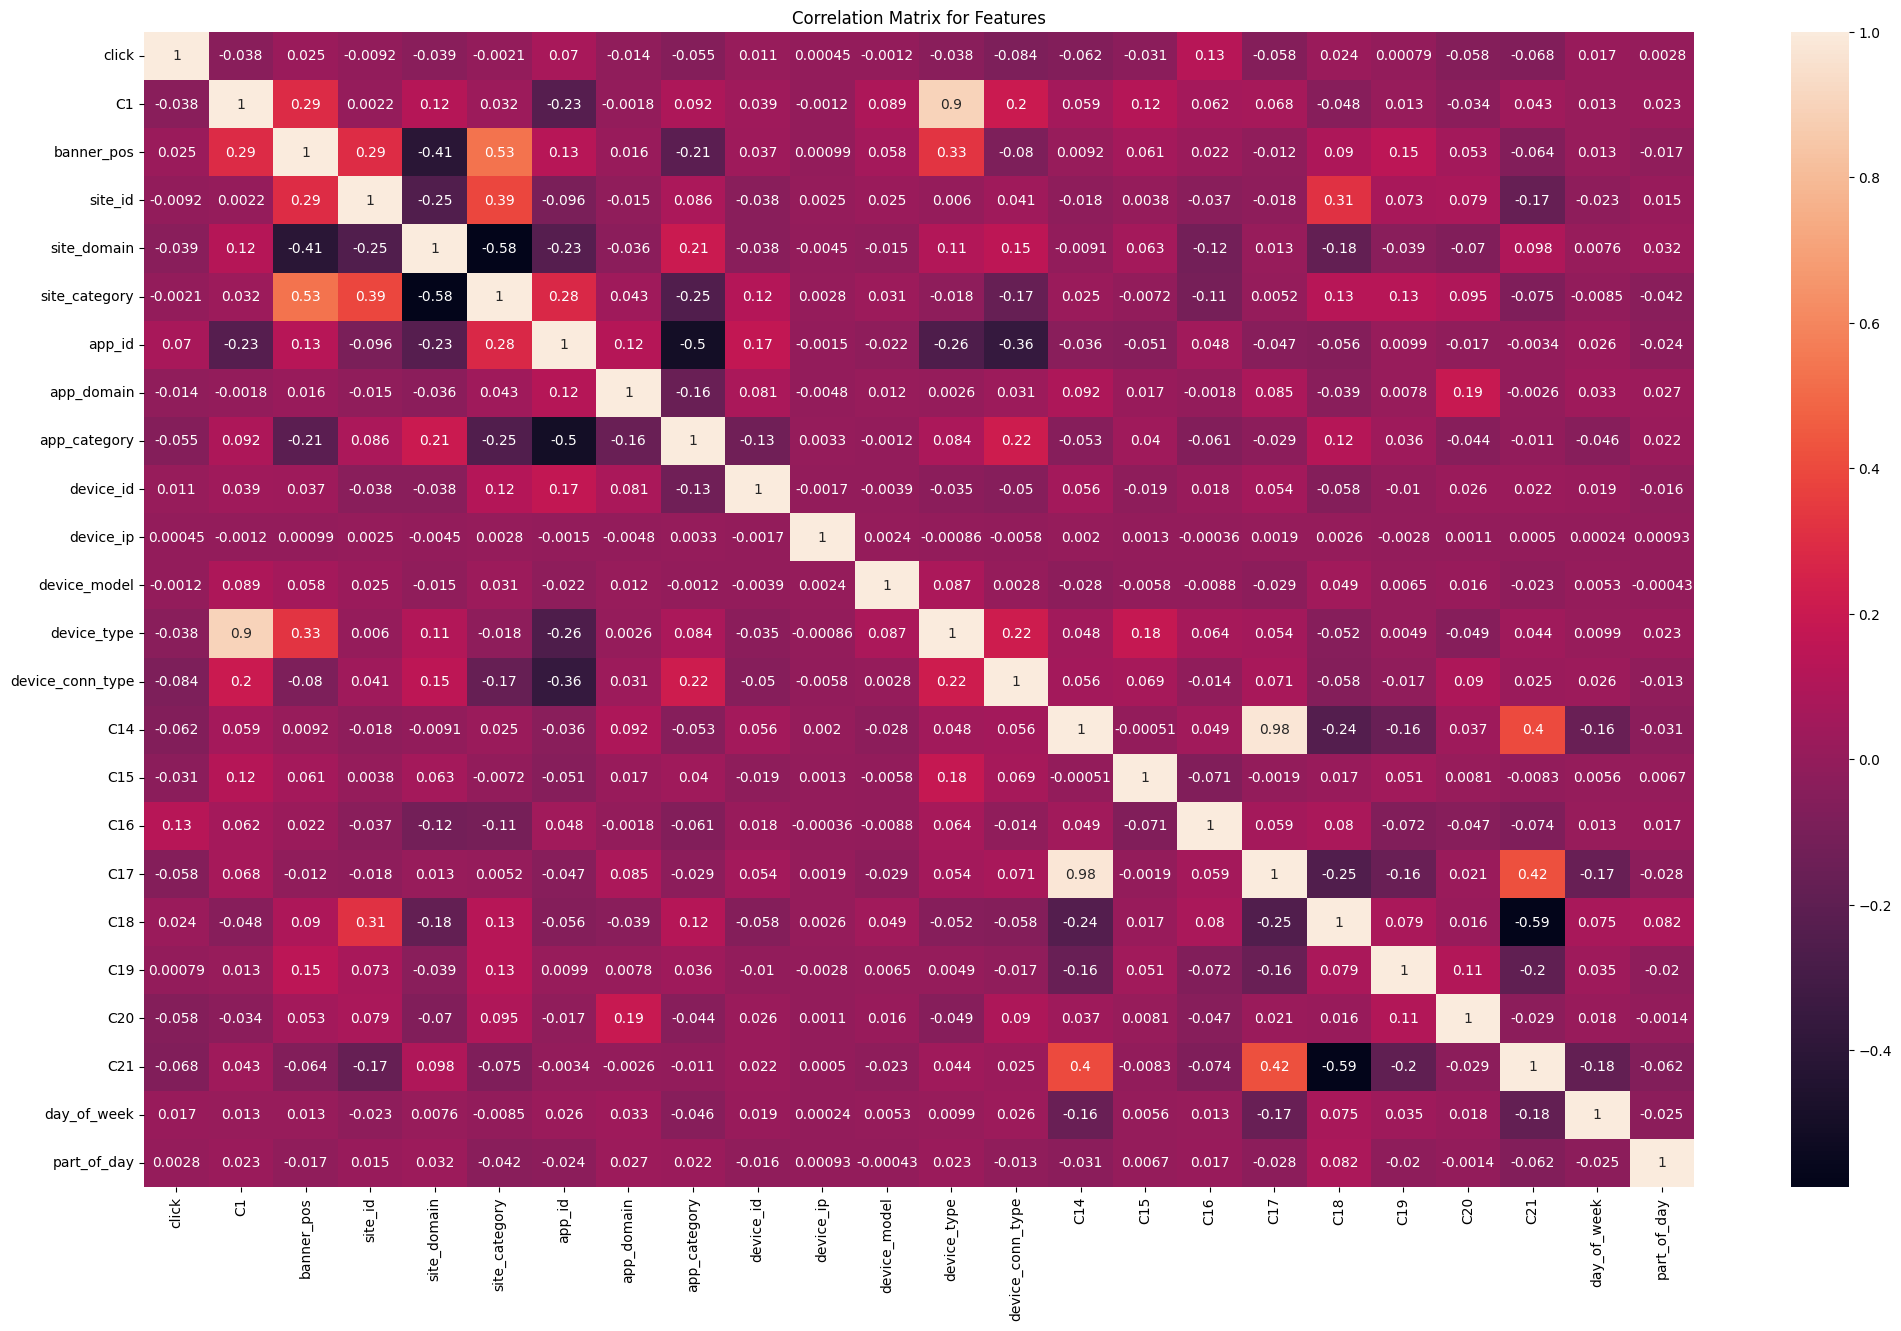

In [ ]:
# Create a correlation matrix for the features
corr_matrix = reduced_data_2.corr()

# Display the correlation matrix
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Features')
plt.show()


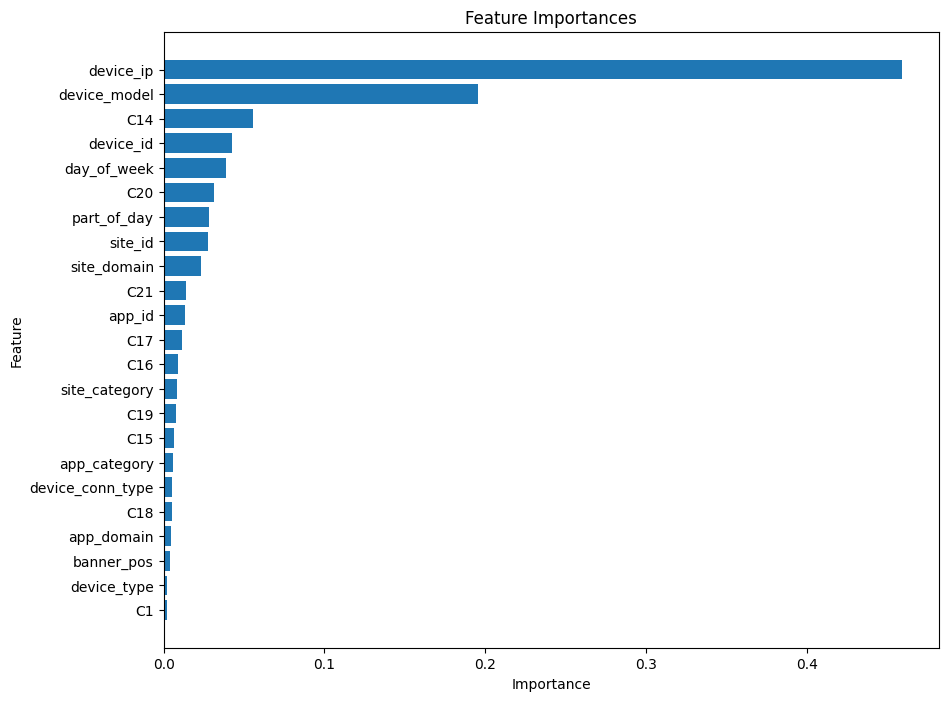

In [ ]:
# Find the feature importance


import pandas as pd # Importing libraries for data manipulation
import matplotlib.pyplot as plt # Importing libraries for data visualization
from sklearn.ensemble import RandomForestClassifier # Importing Scikit-learn modules for machine learning tasks
from sklearn.model_selection import train_test_split # Importing Scikit-learn modules for machine learning tasks

# Assuming df is your DataFrame
# Splitting the data into features and target
X = reduced_data_2.drop('click', axis=1)
y = reduced_data_2['click']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualize the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


In [ ]:
# code to select the first 15 columns with higher feature importance from the above and save data to drive

top_features = feature_importances.head(16)



In [ ]:
top_features

,Feature,Importance
9,device_ip,0.458917
10,device_model,0.195553
13,C14,0.055404
8,device_id,0.042226
21,day_of_week,0.038511
19,C20,0.031470
22,part_of_day,0.028247
2,site_id,0.027814
3,site_domain,0.023419
20,C21,0.014093


In [ ]:
# Define the column names I want to select from the 'reduced_data_2' DataFrame
selected_columns = [
    'device_ip', 'device_model', 'C14', 'device_id', 'day_of_week', 'C20',
    'part_of_day', 'site_id', 'site_domain', 'C21', 'app_id', 'C16',
    'site_category', 'C19', 'C15', 'click' # 'C17' is excluded since it is too correlated to column  C14
]

# Select only the specified columns from 'reduced_data_2'
selected_data = reduced_data_2[selected_columns]



In [ ]:
# Saving pre processed train dataset on my drive

from google.colab import drive # Importing Google Colab module for using Google Drive
import os # Importing os library for operating system dependent functionality

# Mount your Google Drive
drive.mount('/content/drive')

# Specify the path where you want to save the file in your Google Drive
drive_path = '/content/drive/MyDrive/AI & ML/Final Project /'  # You can change this to a specific folder in your Drive
file_name = 'pre_processed_train_data.csv'
full_path = os.path.join(drive_path, file_name)

# Convert your DataFrame to a CSV file and save it in the specified path
selected_data.to_csv(full_path, index=False)

print(f"File saved to: {full_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File saved to: /content/drive/MyDrive/AI & ML/Final Project /pre_processed_train_data.csv


In [1]:
# import packages
import pandas as pd # Importing libraries for data manipulation
import numpy as np # Importing libraries for data manipulation
import os # Importing os library for operating system dependent functionality
import matplotlib.pyplot as plt # Importing libraries for data visualization
import seaborn as sns # Importing libraries for data visualization

In [2]:
from google.colab import drive # Importing Google Colab module for using Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading pre-proceded data
data = pd.read_csv('/content/drive/My Drive/AI & ML/Final Project /pre_processed_train_data.csv')
data.head()

,device_ip,device_model,C14,device_id,day_of_week,C20,part_of_day,site_id,site_domain,C21,app_id,C16,site_category,C19,C15,click
0,4216800,1905,9478,1918736,3,100156,4,3160,3977,61,8433,50,24,1451,320,0
1,3123983,3285,23438,419233,3,-1,2,1794,7506,52,8433,50,6,1327,320,0
2,1354533,2394,20395,2344466,6,100111,4,2546,6124,159,8325,50,6,41,320,0
3,2426860,162,21191,1918736,3,100189,2,2546,6124,71,5231,50,6,175,320,0
4,6108944,803,23551,794370,3,100084,2,2546,6124,212,181,50,6,163,320,0


In [ ]:
import pandas as pd # Importing libraries for data manipulation
import numpy as np # Importing libraries for data manipulation

# Shuffle columns
shuffled_columns = np.random.permutation(data.columns)
data = data[shuffled_columns]

In [5]:
import pandas as pd # Importing libraries for data manipulation
from sklearn.model_selection import train_test_split # Importing Scikit-learn modules for machine learning tasks


X = data.drop('click', axis=1)
y = data['click']

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# The rest of your neural network code goes here...
# For instance, defining and training the model as you have in your original code.


In [15]:
import pandas as pd # Importing libraries for data manipulation
import numpy as np # Importing libraries for data manipulation
import matplotlib.pyplot as plt # Importing libraries for data visualization
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, roc_curve, auc # Importing Scikit-learn modules for machine learning tasks
from keras.models import Sequential # Importing Keras modules for neural network modeling
from keras.layers import Dense # Importing Keras modules for neural network modeling
from keras.callbacks import ModelCheckpoint # Importing Keras modules for neural network modeling
from keras.optimizers import Adam # Importing Keras modules for neural network modeling

# Define custom learning rate
learning_rate = 0.001  # Adjust this value as needed

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with the Adam optimizer and custom learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Corrected file path for the checkpoint callback (using a raw string)
checkpoint_path = r'/content/drive/MyDrive/AI & ML/Final Project/model_weights.h5'  # Update this path as needed

# Define the checkpoint callback
checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min'
)

# Train the model with the checkpoint callback
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=44,
    callbacks=[checkpoint]
)

# Function to calculate and print performance metrics and save classification report
def evaluate_performance(X, y, dataset_name):
    # Predict probabilities and classes
    y_pred_probs = model.predict(X)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Log Loss
    log_loss_value = log_loss(y, y_pred_probs)

    # Classification Report, F1 Score, and Saving Report
    report = classification_report(y, y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    report_df = pd.DataFrame(report).transpose()
    report_df.to_csv(f'{dataset_name.lower()}_classification_report.csv')

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Accuracy
    accuracy = accuracy_score(y, y_pred)

    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    # Print Metrics
    print(f"Performance on {dataset_name} Dataset:")
    print(f"Accuracy: {accuracy}")
    print(f"Log Loss: {log_loss_value}")
    print(f"F1 Score: {f1_score}")
    print("Classification Report:")
    print(report_df)
    print("Normalized Confusion Matrix:")
    print(cm_normalized)

# Make sure to replace X_train, y_train, X_val, y_val with your actual data


Epoch 1/15
79542/79546 [============================>.] - ETA: 0s - loss: 131.9284 - accuracy: 0.8170
Epoch 1: val_loss improved from inf to 0.45596, saving model to /content/drive/MyDrive/AI & ML/Final Project/model_weights.h5
79546/79546 [==============================] - 199s 2ms/step - loss: 131.9227 - accuracy: 0.8170 - val_loss: 0.4560 - val_accuracy: 0.8301
Epoch 2/15
   78/79546 [..............................] - ETA: 2:38 - loss: 0.4379 - accuracy: 0.8415

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


79526/79546 [============================>.] - ETA: 0s - loss: 0.4576 - accuracy: 0.8301
Epoch 2: val_loss improved from 0.45596 to 0.45578, saving model to /content/drive/MyDrive/AI & ML/Final Project/model_weights.h5
79546/79546 [==============================] - 195s 2ms/step - loss: 0.4576 - accuracy: 0.8301 - val_loss: 0.4558 - val_accuracy: 0.8301
Epoch 3/15
79537/79546 [============================>.] - ETA: 0s - loss: 0.4558 - accuracy: 0.8301
Epoch 3: val_loss improved from 0.45578 to 0.45572, saving model to /content/drive/MyDrive/AI & ML/Final Project/model_weights.h5
79546/79546 [==============================] - 196s 2ms/step - loss: 0.4558 - accuracy: 0.8301 - val_loss: 0.4557 - val_accuracy: 0.8301
Epoch 4/15
79542/79546 [============================>.] - ETA: 0s - loss: 0.4558 - accuracy: 0.8301
Epoch 4: val_loss improved from 0.45572 to 0.45563, saving model to /content/drive/MyDrive/AI & ML/Final Project/model_weights.h5
79546/79546 [==============================] - 

In [ ]:
import numpy as np # Importing libraries for data manipulation
from sklearn.model_selection import GridSearchCV # Importing Scikit-learn modules for machine learning tasks
from sklearn.ensemble import RandomForestClassifier # Importing Scikit-learn modules for machine learning tasks
from sklearn.datasets import make_classification # Importing Scikit-learn modules for machine learning tasks
from sklearn.model_selection import train_test_split # Importing Scikit-learn modules for machine learning tasks
from sklearn.metrics import make_scorer, log_loss # Importing Scikit-learn modules for machine learning tasks


# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define a scorer that uses negative log loss
# Note: In scikit-learn, greater is better for score, so we negate the log loss
neg_log_loss_scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

# Set up the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 30],
    'min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=neg_log_loss_scorer, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score (negative log loss):", grid_search.best_score_)

# Evaluate on validation set
val_score = log_loss(y_val, grid_search.best_estimator_.predict_proba(X_val))
print("Validation set log loss:", val_score)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time= 6.4min
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time= 6.5min
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time= 6.5min
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time= 6.7min
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time= 6.6min
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=13.0min
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=13.3min
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=13.6min
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=13.9min
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=13.7min
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=20.3min
[CV] END max_depth=10, min_samples_split=2, n_e

KeyboardInterrupt: ignored

In [ ]:
data.head()

,part_of_day,C21,site_id,site_domain,device_model,C14,C20,device_id,C15,site_category,C16,app_id,day_of_week,C19,click,device_ip
0,4,61,3160,3977,1905,9478,100156,1918736,320,24,50,8433,3,1451,0,4216800
1,2,52,1794,7506,3285,23438,-1,419233,320,6,50,8433,3,1327,0,3123983
2,4,159,2546,6124,2394,20395,100111,2344466,320,6,50,8325,6,41,0,1354533
3,2,71,2546,6124,162,21191,100189,1918736,320,6,50,5231,3,175,0,2426860
4,2,212,2546,6124,803,23551,100084,794370,320,6,50,181,3,163,0,6108944


In [6]:
from sklearn.ensemble import RandomForestClassifier # Importing Scikit-learn modules for machine learning tasks
from sklearn.metrics import log_loss # Importing Scikit-learn modules for machine learning tasks
from sklearn.model_selection import train_test_split # Importing Scikit-learn modules for machine learning tasks

# ... [data loading code]

# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a range of values for n_estimators and max_depth
n_estimators_options = [100, 200, 300]
max_depth_options = [10, 15, 20]

best_score = float("inf")
best_params = {}

# Iterate over the range of values
for n_estimators in n_estimators_options:
    for max_depth in max_depth_options:
        # Train the model
        rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf_model.fit(X_train, y_train)

        # Evaluate the model
        val_score = log_loss(y_val, rf_model.predict_proba(X_val))

        # Update best score and parameters
        if val_score < best_score:
            best_score = val_score
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}

# Print the best parameters and corresponding score
print("Best parameters:", best_params)
print("Best score (log loss):", best_score)


Best parameters: {'n_estimators': 300, 'max_depth': 20}
Best score (log loss): 0.39762833751658744


In [7]:
rf_model = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=300, random_state=42)

In [8]:
pred = rf_model.predict(X_val)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, roc_curve, auc # Importing Scikit-learn modules for machine learning tasks


classification_report(y_val, pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.99      0.91   1245224\n           1       0.60      0.08      0.14    254776\n\n    accuracy                           0.83   1500000\n   macro avg       0.72      0.53      0.52   1500000\nweighted avg       0.80      0.83      0.78   1500000\n'

In [13]:
from sklearn.metrics import confusion_matrix # Importing Scikit-learn modules for machine learning tasks
import numpy as np # Importing libraries for data manipulation

# Assuming 'pred' is your predictions and 'y_val' is the true labels

# Calculate the confusion matrix
cm = confusion_matrix(y_val, pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Convert to percentage
cm_percentage = cm_normalized * 100

# Print or use the confusion matrix in percentage form
print(cm_percentage)


[[98.92975079  1.07024921]
 [92.10914686  7.89085314]]


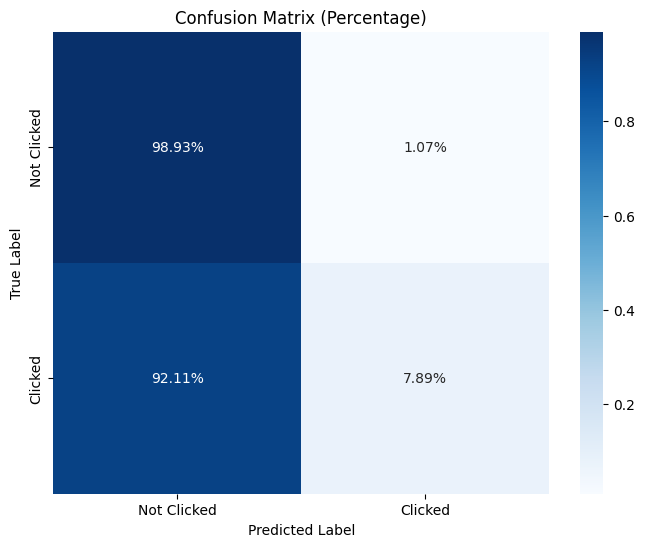

In [16]:
import matplotlib.pyplot as plt # Importing libraries for data visualization
import seaborn as sns # Importing libraries for data visualization
from sklearn.metrics import confusion_matrix # Importing Scikit-learn modules for machine learning tasks

# Assuming 'y_val' are your true labels and 'pred' are your predictions
# You can get the confusion matrix from scikit-learn
cm = confusion_matrix(y_val, pred)

# Normalize the confusion matrix to show percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt=".2%", cmap='Blues',
            xticklabels=['Not Clicked', 'Clicked'],
            yticklabels=['Not Clicked', 'Clicked'])
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
import xgboost as xgb # Importing XGBoost for gradient boosting
import numpy as np # Importing libraries for data manipulation
from sklearn.model_selection import train_test_split # Importing Scikit-learn modules for machine learning tasks

# Define your calculate_log_loss function
def calculate_log_loss(y_true, y_pred):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Initialize an XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.1,
    objective='binary:logistic',
    n_jobs=-1,
    random_state=42
)

# Fit the model to the training set
model.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Assuming a binary classification; adjust if necessary

# Calculate log loss
log_loss = calculate_log_loss(y_test, y_pred_prob)
print(f'Log Loss: {log_loss}')

In [ ]:
import numpy as np # Importing libraries for data manipulation
import pandas as pd # Importing libraries for data manipulation
from sklearn.metrics import confusion_matrix # Importing Scikit-learn modules for machine learning tasks
import matplotlib.pyplot as plt # Importing libraries for data visualization
import seaborn as sns # Importing libraries for data visualization

# Predict class labels based on a threshold
threshold = 0.5
y_pred_class = (y_pred_prob > threshold).astype(int)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Normalize the confusion matrix to show percentages
cm_percentage = cm / cm.sum(axis=1).reshape(-1, 1)

# Plotting the confusion matrix in percentage
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Not Clicked', 'Clicked'], yticklabels=['Not Clicked', 'Clicked'])
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [1]:
# import packages
import pandas as pd # Importing libraries for data manipulation
import numpy as np # Importing libraries for data manipulation
import os # Importing os library for operating system dependent functionality
import matplotlib.pyplot as plt # Importing libraries for data visualization
import seaborn as sns # Importing libraries for data visualization

In [2]:
from google.colab import drive # Importing Google Colab module for using Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Varibales holding path to my datasets both train and test

file_path_Train_2 = '/content/drive/MyDrive/AI & ML/Final Project /ProjectTrainingData.csv'
file_path_Test_2 = '/content/drive/MyDrive/AI & ML/Final Project /ProjectTestData.csv'

In [4]:
# Loading datasets
data_train = pd.read_csv(file_path_Train_2)
data_test = pd.read_csv(file_path_Test_2)

In [5]:
def label_encoding_on_train_test(train_df, test_df):
    #train_df = train_df.drop('click', axis=1)
    cat_cols = train_df.select_dtypes(include='object').columns

    train_label_encoded = train_df.copy()
    test_label_encoded = test_df.copy()

    for col in cat_cols:
        le = LabelEncoder()

        # Corrected concatenation for fitting the encoder
        # It concatenates the values of the column from both dataframes
        le.fit(pd.concat([train_df[col], test_df[col]], ignore_index=True))

        # Transform the training and test data with the fitted encoder
        train_label_encoded[col] = le.transform(train_df[col])
        test_label_encoded[col] = le.transform(test_df[col])

    return train_label_encoded, test_label_encoded

In [6]:
# Reuse the function to perform encoding
from sklearn.preprocessing import LabelEncoder # Importing Scikit-learn modules for machine learning tasks
train_label_encoded, test_label_encoded = label_encoding_on_train_test(data_train, data_test)

In [7]:
# Transforming hour column in the test dataset before exporting it

# Transforming hour variable
# Convert 'hour' to datetime
test_label_encoded['hour'] = pd.to_datetime(test_label_encoded['hour'], format='%y%m%d%H')

# Create 'day_of_week' column
test_label_encoded['day_of_week'] = test_label_encoded['hour'].dt.day_name()

In [8]:
# Function to categorize part of the day with numerical values
def get_part_of_day(hour):
    if 5 <= hour < 11:
        return 1  # morning
    elif 11 <= hour < 17:
        return 2  # noon
    elif 17 <= hour < 20:
        return 3  # evening
    else:
        return 4  # night


# Create 'part_of_day' column
test_label_encoded['part_of_day'] = test_label_encoded['hour'].dt.hour.apply(get_part_of_day)

In [9]:
# Label encoding day of the week column into numerical values

# Sample data
days = {'day_of_week': ['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday']}
# Custom mapping for days of the week
day_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

# Apply the mapping to the 'day_of_week' column
test_label_encoded['day_of_week'] = test_label_encoded['day_of_week'].map(day_mapping)

In [14]:
# Saving encoded test dataset on my drive

from google.colab import drive # Importing Google Colab module for using Google Drive
import os # Importing os library for operating system dependent functionality

# Mount your Google Drive
drive.mount('/content/drive')

# Specify the path where you want to save the file in your Google Drive
drive_path = '/content/drive/MyDrive/AI & ML/Final Project /'  # You can change this to a specific folder in your Drive
file_name = 'test_label_encoded.csv'
full_path = os.path.join(drive_path, file_name)

# Convert your DataFrame to a CSV file and save it in the specified path
test_label_encoded.to_csv(full_path, index=False)

print(f"File saved to: {full_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File saved to: /content/drive/MyDrive/AI & ML/Final Project /test_label_encoded.csv


In [17]:
# To free up RAM by deleting

import gc # Importing garbage collection module
# Delete the variable
del test_label_encoded
# Run the garbage collector
gc.collect()


19

In [19]:
#Inspecting distribution for each class
train_label_encoded['click'].value_counts()

0    26556113
1     5434977
Name: click, dtype: int64

In [20]:
# Transforming hour column in the test dataset before exporting it

# Transforming hour variable
# Convert 'hour' to datetime
train_label_encoded['hour'] = pd.to_datetime(train_label_encoded['hour'], format='%y%m%d%H')

# Create 'day_of_week' column
train_label_encoded['day_of_week'] = train_label_encoded['hour'].dt.day_name()

In [21]:
# Function to categorize part of the day with numerical values
def get_part_of_day(hour):
    if 5 <= hour < 11:
        return 1  # morning
    elif 11 <= hour < 17:
        return 2  # noon
    elif 17 <= hour < 20:
        return 3  # evening
    else:
        return 4  # night


# Create 'part_of_day' column
train_label_encoded['part_of_day'] = train_label_encoded['hour'].dt.hour.apply(get_part_of_day)

In [22]:
# Label encoding day of the week column into numerical values

# Sample data
days = {'day_of_week': ['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday']}
# Custom mapping for days of the week
day_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

# Apply the mapping to the 'day_of_week' column
train_label_encoded['day_of_week'] = train_label_encoded['day_of_week'].map(day_mapping)

In [24]:
# dropoing id from the train dataset
data = train_label_encoded.drop('id', axis=1)

In [25]:
data=data.drop('hour', axis=1)

In [27]:
del train_label_encoded

In [30]:
import pandas as pd # Importing libraries for data manipulation

# Assuming 'data' is your DataFrame and it has a binary target column named 'target'

# Count the number of ones
ones_count = data[data['click'] == 1].shape[0]

# Calculate the number of zeros to sample
total_desired = 10000000  # total desired sample size
zeros_to_sample = total_desired - ones_count

# Sample from the zeros
zeros_sampled = data[data['click'] == 0].sample(zeros_to_sample, random_state=42)

# Concatenate the ones and the sampled zeros
undersampled_data = pd.concat([data[data['click'] == 1], zeros_sampled])

# Shuffle the dataset (optional, but often a good idea)
undersampled_data = undersampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Now, 'undersampled_data' is your new DataFrame with the desired undersampling


In [31]:
#Inspecting distribution for each class
undersampled_data['click'].value_counts()

1    5434977
0    4565023
Name: click, dtype: int64

In [32]:
undersampled_data.shape

(10000000, 24)

In [35]:
# Free up space
del data

In [36]:
# Saving encoded train dataset on my drive

from google.colab import drive # Importing Google Colab module for using Google Drive
import os # Importing os library for operating system dependent functionality

# Mount your Google Drive
drive.mount('/content/drive')

# Specify the path where you want to save the file in your Google Drive
drive_path = '/content/drive/MyDrive/AI & ML/Final Project /'  # You can change this to a specific folder in your Drive
file_name = 'pre-processed_label_encoded.csv'
full_path = os.path.join(drive_path, file_name)

# Convert your DataFrame to a CSV file and save it in the specified path
undersampled_data.to_csv(full_path, index=False)

print(f"File saved to: {full_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File saved to: /content/drive/MyDrive/AI & ML/Final Project /pre-processed_label_encoded.csv


In [1]:
# import packages
import pandas as pd # Importing libraries for data manipulation
import numpy as np # Importing libraries for data manipulation
import os # Importing os library for operating system dependent functionality
import matplotlib.pyplot as plt # Importing libraries for data visualization
import seaborn as sns # Importing libraries for data visualization

In [2]:
from google.colab import drive # Importing Google Colab module for using Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Varibales holding path to my datasets both train and test

file_path_Train_3 = '/content/drive/MyDrive/AI & ML/Final Project /pre-processed_label_encoded.csv'

In [4]:
data = pd.read_csv(file_path_Train_3)

In [5]:
# Define the column names I want to select from the 'data' DataFrame
selected_columns = [
    'device_ip', 'device_model', 'C14', 'device_id', 'day_of_week', 'C20',
    'part_of_day', 'site_id', 'site_domain', 'C21', 'app_id', 'C16',
    'site_category', 'C19', 'C15', 'click' # 'C17' is excluded since it is too correlated to column  C14
]

selected_data = data[selected_columns]

In [6]:
import pandas as pd # Importing libraries for data manipulation
import numpy as np # Importing libraries for data manipulation

# Shuffle columns
shuffled_columns = np.random.permutation(selected_data.columns)
data = selected_data[shuffled_columns]

In [7]:
# Saving encoded train dataset on my drive after selecting features

from google.colab import drive # Importing Google Colab module for using Google Drive
import os # Importing os library for operating system dependent functionality

# Mount to Google Drive
drive.mount('/content/drive')

# Specify the path where I want to save the file in my Google Drive
drive_path = '/content/drive/MyDrive/AI & ML/Final Project /'  # You can change this to a specific folder in your Drive
file_name = 'pre-processed_data_modeling.csv'
full_path = os.path.join(drive_path, file_name)

# Convert DataFrame to a CSV file and save it in the specified path
data.to_csv(full_path, index=False)

print(f"File saved to: {full_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File saved to: /content/drive/MyDrive/AI & ML/Final Project /pre-processed_data_modeling.csv


In [9]:
import pandas as pd # Importing libraries for data manipulation
import numpy as np # Importing libraries for data manipulation
import matplotlib.pyplot as plt # Importing libraries for data visualization
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, roc_curve, auc # Importing Scikit-learn modules for machine learning tasks
from keras.models import Sequential # Importing Keras modules for neural network modeling
from keras.layers import Dense # Importing Keras modules for neural network modeling
from keras.callbacks import ModelCheckpoint # Importing Keras modules for neural network modeling
from keras.optimizers import Adam # Importing Keras modules for neural network modeling
from sklearn.model_selection import train_test_split # Importing Scikit-learn modules for machine learning tasks


X = data.drop('click', axis=1)
y = data['click']

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# Define custom learning rate
learning_rate = 0.001  # Adjust this value as needed

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with the Adam optimizer and custom learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Corrected file path for the checkpoint callback (using a raw string)
checkpoint_path = r'/content/drive/MyDrive/AI & ML/Final Project/model_weights.click'  # Update this path as needed

# Define the checkpoint callback
checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min'
)

# Train the model with the checkpoint callback
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64,
    callbacks=[checkpoint]
)

# Function to calculate and print performance metrics and save classification report
def evaluate_performance(X, y, dataset_name):
    # Predict probabilities and classes
    y_pred_probs = model.predict(X)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Log Loss
    log_loss_value = log_loss(y, y_pred_probs)

    # Classification Report, F1 Score, and Saving Report
    report = classification_report(y, y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    report_df = pd.DataFrame(report).transpose()
    report_df.to_csv(f'{dataset_name.lower()}_classification_report.csv')

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Accuracy
    accuracy = accuracy_score(y, y_pred)

    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    # Print Metrics
    print(f"Performance on {dataset_name} Dataset:")
    print(f"Accuracy: {accuracy}")
    print(f"Log Loss: {log_loss_value}")
    print(f"F1 Score: {f1_score}")
    print("Classification Report:")
    print(report_df)
    print("Normalized Confusion Matrix:")
    print(cm_normalized)

# Make sure to replace X_train, y_train, X_val, y_val with your actual data


Epoch 1/10
117182/117188 [============================>.] - ETA: 0s - loss: 53.6686 - accuracy: 0.5415
Epoch 1: val_loss improved from inf to 0.68944, saving model to /content/drive/MyDrive/AI & ML/Final Project/model_weights.click
117188/117188 [==============================] - 305s 3ms/step - loss: 53.6661 - accuracy: 0.5415 - val_loss: 0.6894 - val_accuracy: 0.5432
Epoch 2/10
117178/117188 [============================>.] - ETA: 0s - loss: 0.6894 - accuracy: 0.5436
Epoch 2: val_loss improved from 0.68944 to 0.68938, saving model to /content/drive/MyDrive/AI & ML/Final Project/model_weights.click
117188/117188 [==============================] - 300s 3ms/step - loss: 0.6894 - accuracy: 0.5436 - val_loss: 0.6894 - val_accuracy: 0.5432
Epoch 3/10
117188/117188 [==============================] - ETA: 0s - loss: 0.6894 - accuracy: 0.5436
Epoch 3: val_loss did not improve from 0.68938
117188/117188 [==============================] - 305s 3ms/step - loss: 0.6894 - accuracy: 0.5436 - val_lo